#### 1 Introduction

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Base URL para los chunks
base_url = "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_"

In [3]:
# Lista para almacenar los datos de todos los chunks
all_data = []

In [ ]:
# Iterar sobre las 10 páginas
for i in range(1, 11):
    # Construir la URL para cada chunk
    url = f"{base_url}{i}.html"
    print(f"Scraping {url}...")  # Opcional: para monitorear el progreso

    # Hacer la solicitud HTTP
    response = requests.get(url)

    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar la tabla
    table = soup.find('table')

    # Extraer los encabezados
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extraer las filas de la tabla
    rows = []
    for row in table.find_all('tr'):
        cells = [cell.text.strip() for cell in row.find_all('td')]
        if cells:
            rows.append(cells)

    # Crear un DataFrame temporal
    df = pd.DataFrame(rows, columns=headers)

    # Agregar el DataFrame temporal a la lista de todos los datos
    all_data.append(df)

Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_1.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_2.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_3.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_4.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_5.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_6.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_7.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_8.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_9.html...
Scraping https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_10.html...


In [ ]:
# Combinar todos los DataFrames en uno solo
final_data = pd.concat(all_data, ignore_index=True)

In [ ]:
display(final_data)

,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NA,NA,NA,8404.3203125,NA,NA,NA,NA,1620833.25,8404.3203125
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NA,NA,NA,3345.5556640625,NA,NA,NA,NA,1003666.6875,3345.5556640625
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,5e+05,NA,NA,25958.333984375,NA,NA,NA,NA,6675000,25958.333984375
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
#Lo exporto como csv así no hay que scrappear cada vez que lo abrimos
final_data.to_csv("final_data.csv", index=False)

NameError: name 'final_data' is not defined

In [ ]:
#generar una copia de la base de datos con copy
df_1 = final_data.copy()

In [4]:
#Lo vuelvo a agregar porque no me deja abrirlo desde el colab
df_1 = pd.read_csv("https://raw.githubusercontent.com/dipla70/ML-TP1/main/final_data.csv", sep=",")

# Display the DataFrame to confirm successful loading
display(df_1)



,Unnamed: 0,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1.620833e+06,8404.320312
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NaN,NaN,NaN,3345.555664,NaN,NaN,NaN,NaN,1.003667e+06,3345.555664
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,500000.0,NaN,NaN,25958.333984,NaN,NaN,NaN,NaN,6.675000e+06,25958.333984
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Introducción

En este trabajo práctico, nuestro objetivo es construir un modelo de predicción de ingresos por hora individual:

$$
w = f(X) + u
$$

donde $w$ representa el ingreso por hora, y $X$ es una matriz de variables explicativas/predictoras potenciales. Nos centraremos en un modelo lineal de la forma:

$$
\ln(w) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p + u
$$

Para evaluar la capacidad predictiva del modelo, dividiremos el conjunto de datos en dos subconjuntos: una parte denominada "live-data "para entrenar el modelo y otra aprte denominada "unseen-data" evaluar su desempeño, siguiendo el método **train-test split** de la librería **SKLearn**. El uso de particiones como 70%-30% o 80%-20% nos permitirá balancear la cantidad de datos destinados al entrenamiento y la evaluación, asegurando a su vez reproducibilidad mediante un **random state**. Este enfoque es particularmente relevante en problemas donde el tamaño de la muestra impacta la precisión del modelo. Al dividir la muestra perderemos eficiencia pero ganamos por el lado de estimar directamente el error de pérdida. Además, incorporaremos técnicas de remuestreo como **bootstrap**, que permiten generar múltiples subconjuntos de datos mediante muestreo aleatorio con reemplazo. Estas técnicas son útiles para estimar la incertidumbre en las predicciones y evaluar la robustez del modelo frente a diferentes particiones de datos.


Para este análisis, utilizaremos datos de Bogotá obtenidos del informe de 2018 *Medición de Pobreza Monetaria y Desigualdad*, basado en la Gran Encuesta Integrada de Hogares (GEIH). Este conjunto de datos proporciona información detallada sobre empleo, ingresos, educación y características demográficas, lo que lo hace adecuado para el análisis.

En las siguientes secciones, describiremos el proceso de obtención y limpieza de los datos, realizaremos un análisis exploratorio y evaluaremos el poder predictivo de distintas especificaciones del modelo. Además, exploraremos cómo las técnicas de remuestreo como bootstrap contribuyen a una mejor estimación del error de predicción fuera de muestra.

### 1.1 General Instructions


In [5]:
#Filtro el df con edad +18 y que estén empleados

df_2 = df_1[(df_1["age"]>=18)&(df_1["ocu"]==1)].copy()

In [6]:
df_2.shape

(16542, 178)

In [7]:
#Variable y_ingLab_m_ha debe ser la dependiente. Es el salario por hora.

df_2['y_ingLab_m_ha'].agg(['mean', 'median', 'std', 'min', 'max'])

print(df_1['y_ingLab_m_ha'].isna().sum())
print((df_1['y_ingLab_m_ha'] == 0).sum())


22213
0


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## 3 Predicting Wages

En este inciso,

In [9]:
df_2.head()

,Unnamed: 0,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1620833.250,8404.320312
8,9,4514333,1,1,1,BOGOTA,1,2,1,51,...,NaN,NaN,NaN,6703.342773,NaN,NaN,NaN,NaN,1378973.375,6703.342773
13,14,4514334,1,1,1,BOGOTA,1,2,1,45,...,NaN,NaN,NaN,3680.654053,NaN,NaN,NaN,NaN,883357.000,3680.654053
15,16,4514335,1,1,1,BOGOTA,1,2,1,61,...,NaN,NaN,NaN,4083.333252,NaN,NaN,NaN,NaN,700000.000,4083.333252
21,22,4514338,1,2,1,BOGOTA,1,2,0,35,...,NaN,NaN,NaN,9437.847656,NaN,NaN,NaN,NaN,1941500.125,9437.847656


In [10]:
df_2.rename(columns={'y_ingLab_m_ha': 'w'} , inplace=True)  # renombro dependiente
df_2.drop(columns=['Unnamed: 0', 'directorio', 'fex_c', 'fex_dpto', 'orden','dominio' ], inplace=True)


# saco predictores que creo no son relevantes
cols_to_drop = [col for col in df_2.columns if col.startswith('y_') | col.startswith('p') | col.startswith('i')]

# Elimine esas columnas
df_3 = df_2.drop(columns=cols_to_drop )

df_3 = df_3.loc[:, ~df_3.columns.str.startswith('cclasnr')] #Eliminamos estas columnas porque son casi todas NaN

**Estimación primer modelo**: \\
Agregamos la primer estimación. En este caso, lo hacemos de la forma más sencilla posible: Eliminamos todas las filas donde alguna de las variables tome el valor NaN. Para el caso de la variable salario, la cantidad de NaN asciende a 6650. Luego, la única variable que posee valores missing es "regSalud", de la cual también borramos las observaciones NaN.



In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
#Incluyo también el w para borrar todos los missing
X = ['w','age', 'sex', 'clase', 'depto', 'formal', 'maxEducLevel', 'oficio','relab', 'college', 'regSalud', 'totalHoursWorked', 'cuentaPropia', 'microEmpresa', 'sizeFirm']

X = df_3.loc[:, X].dropna()  #borro todos los missing

y = X.loc[:, 'w'] # tomo variable dependiente
X.drop('w', axis=1, inplace=True) #borro "w" de las variables independientes
X.shape #chequeo que esté todo bien


(9308, 14)

In [13]:
X.describe()

,age,sex,clase,depto,formal,maxEducLevel,oficio,relab,college,regSalud,totalHoursWorked,cuentaPropia,microEmpresa,sizeFirm
count,9308.000000,9308.000000,9308.0,9308.0,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.0,9308.000000,9308.000000
mean,36.497422,0.496670,1.0,11.0,0.815535,6.120971,47.456059,1.171895,0.339815,1.192093,48.147400,0.0,0.200258,4.014074
std,12.023735,0.500016,0.0,0.0,0.387884,1.097962,27.473756,0.506641,0.473672,0.562667,11.751207,0.0,0.400215,1.299766
min,18.000000,0.000000,1.0,11.0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000
25%,27.000000,0.000000,1.0,11.0,1.000000,6.000000,32.000000,1.000000,0.000000,1.000000,48.000000,0.0,0.000000,3.000000
50%,34.000000,0.000000,1.0,11.0,1.000000,6.000000,45.000000,1.000000,0.000000,1.000000,48.000000,0.0,0.000000,5.000000
75%,45.000000,1.000000,1.0,11.0,1.000000,7.000000,58.000000,1.000000,1.000000,1.000000,48.000000,0.0,0.000000,5.000000
max,86.000000,1.000000,1.0,11.0,1.000000,7.000000,99.000000,8.000000,1.000000,3.000000,130.000000,0.0,1.000000,5.000000


In [14]:
#contamos los NaN
np.isnan(y).sum()

0

In [15]:
#Creamos las muestras de entrenamiento para el MODELO 1
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )  # split the sample into two

In [16]:
model2 =  LinearRegression().fit(X_train[['maxEducLevel']], y_train)
model2.coef_

# Print del beta estimado
print(f'Beta estimado (maxEducLevel): {model2.coef_})')

y_hat_model2 = model2.predict(X_test[["maxEducLevel"]])
mse2 = mean_squared_error(y_test, y_hat_model2)
print(f'Mean Squared Error: {mse2}')

Beta estimado (maxEducLevel): [3237.32489718])
Mean Squared Error: 130829257.37416054


In [18]:
# Modelo 3 con MaxEducLevel al cuadrado
# hacer al cudrado la variable
X_train['maxEducLevel2'] = X_train['maxEducLevel']**2
# cuadrado para el xtest tambien
X_test['maxEducLevel2'] = X_test['maxEducLevel']**2

model3 = LinearRegression().fit(X_train[['maxEducLevel','maxEducLevel2']], y_train)
model3.coef_

# Print del beta estimado
print(f'Betas estimados (maxEducLevel) (maxEducLevel2): {model3.coef_})')

y_hat_model3 = model3.predict(X_test[['maxEducLevel','maxEducLevel2']])
mse3 = mean_squared_error(y_test, y_hat_model3)
print(f'Mean Squared Error: {mse3}')

Betas estimados (maxEducLevel) (maxEducLevel2): [-11243.70843751   1370.73153434])
Mean Squared Error: 126147475.22362873


In [19]:
#modelo 4 con modelo 3 + edad sin transformar

model4 = LinearRegression().fit(X_train[['maxEducLevel','maxEducLevel2','age']], y_train)
model4.coef_

# Print del beta estimado
print(f'Beta estimado (maxEducLevel3): {model4.coef_})')

y_hat_model4 = model4.predict(X_test[['maxEducLevel','maxEducLevel2','age']])
mse4 = mean_squared_error(y_test, y_hat_model4)
print(f'Mean Squared Error: {mse4}')

Beta estimado (maxEducLevel3): [-9265.45599976  1268.03515613   257.79968058])
Mean Squared Error: 118351276.91657086


In [20]:
#modelo 5 con modelo 3 + edad al cuadrado
# hacer al cuadrado la variable
X_train['age2'] = X_train['age']**2
# cuadrado para el xtest tambien
X_test['age2'] = X_test['age']**2

model5 = LinearRegression().fit(X_train[['maxEducLevel','maxEducLevel2','age','age2']], y_train)
model5.coef_

# Print del beta estimado
print(f'Beta estimado (maxEducLevel3): {model5.coef_})')

y_hat_model5 = model5.predict(X_test[['maxEducLevel','maxEducLevel2','age','age2']])
mse5 = mean_squared_error(y_test, y_hat_model5)
print(f'Mean Squared Error: {mse5}')

Beta estimado (maxEducLevel3): [-9.47898891e+03  1.28226881e+03  5.91323127e+02 -4.17743929e+00])
Mean Squared Error: 117856842.26613037


In [21]:
#modelo 6 es modelo 5 + sex
model6 = LinearRegression().fit(X_train[['maxEducLevel','maxEducLevel2','age','age2', 'sex']], y_train)
model6.coef_

# Print del beta estimado
print(f'Beta estimado (maxEducLevel3): {model6.coef_})')

y_hat_model6 = model6.predict(X_test[['maxEducLevel','maxEducLevel2','age','age2', 'sex']])
mse6 = mean_squared_error(y_test, y_hat_model6)
print(f'Mean Squared Error: {mse6}')

Beta estimado (maxEducLevel3): [-9.67575942e+03  1.30545810e+03  6.04204302e+02 -4.30912064e+00
  1.31464762e+03])
Mean Squared Error: 117075919.83065294


In [22]:
#modelo 7 es modelo 6 + formal
model7 = LinearRegression().fit(X_train[['maxEducLevel','maxEducLevel2','age','age2', 'sex', 'formal']], y_train)
model7.coef_

# Print del beta estimado
print(f'Beta estimado (maxEducLevel3): {model7.coef_})')

y_hat_model7 = model7.predict(X_test[['maxEducLevel','maxEducLevel2','age','age2', 'sex', 'formal']])
mse7 = mean_squared_error(y_test, y_hat_model7)
print(f'Mean Squared Error: {mse7}')

Beta estimado (maxEducLevel3): [-9.52362190e+03  1.26721551e+03  5.27167278e+02 -3.43142707e+00
  1.12540092e+03  2.41887006e+03])
Mean Squared Error: 116455443.60234322


In [23]:
#modelo 8 es modelo 7 + oficio
model8 = LinearRegression().fit(X_train[['maxEducLevel','maxEducLevel2','age','age2', 'sex', 'formal', 'oficio']], y_train)
model8.coef_

# Print del beta estimado
print(f'Beta estimado (maxEducLevel3): {model8.coef_})')

y_hat_model8 = model8.predict(X_test[['maxEducLevel','maxEducLevel2','age','age2', 'sex', 'formal', 'oficio']])
mse8 = mean_squared_error(y_test, y_hat_model8)
print(f'Mean Squared Error: {mse8}')

Beta estimado (maxEducLevel3): [-6.02258031e+03  8.23173051e+02  5.27556121e+02 -3.54460491e+00
  2.08367363e+03  2.19814399e+03 -9.96124799e+01])
Mean Squared Error: 112786872.18625233


In [24]:
#modelo 9 con todas las variables
model9 = LinearRegression().fit(X_train, y_train)
model9.coef_

# Print del beta estimado
print(f'Beta estimado (model9): {model9.coef_})')

y_hat_model9 = model9.predict(X_test)
mse9 = mean_squared_error(y_test, y_hat_model9)
print(f'Mean Squared Error: {mse9}')

Beta estimado (model9): [ 5.72332216e+02  2.14042422e+03 -3.35376171e-12 -2.34479103e-12
  1.09435782e+03 -2.55526568e+03 -8.81533362e+01  2.69974774e+02
 -2.07460119e+03  2.22040260e+02 -1.15013684e+02  9.09494702e-13
  1.62624002e+03  1.61150661e+03  4.55692880e+02 -4.24062816e+00])
Mean Squared Error: 110738231.03563067


In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
#modelo 10 con variables al cuadrado
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
model10 =  LinearRegression().fit(X_train_poly,y_train)

#prediction on new data
X_test_poly = poly.fit_transform(X_test)
y_hat_model10 = model10.predict(X_test_poly)

# Calculate Mean Squared Error
mse10 = mean_squared_error(y_test, y_hat_model10)

print(f'Mean Squared Error: {mse10}')

Mean Squared Error: 101367820.33827998


In [27]:

poly = PolynomialFeatures(degree=3)

X_train_poly3 = poly.fit_transform(X_train)


model11 =  LinearRegression().fit(X_train_poly3,y_train)

#prediction on new data
X_test_poly3= poly.fit_transform(X_test)
y_hat_model11 = model11.predict(X_test_poly3)

# Calculate Mean Squared Error
mse11 = mean_squared_error(y_test, y_hat_model11)

print(f'Mean Squared Error: {mse11}')

Mean Squared Error: 107004782.47350703


In [28]:

poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)


model12 =  LinearRegression().fit(X_train_poly,y_train)

In [29]:
#prediction on new data
X_test_poly = poly.fit_transform(X_test)
y_hat_model12 = model12.predict(X_test_poly)

# Calculate Mean Squared Error
mse12 = mean_squared_error(y_test, y_hat_model12)

print(f'Mean Squared Error: {mse12}')

Mean Squared Error: 1779523110.359452


In [31]:
# Crear un diccionario con los nombres de los modelos y sus MSE
mse_dict = {
    'Model 2': mse2,
    'Model 3': mse3,
    'Model 4': mse4,
    'Model 5': mse5,
    'Model 6': mse6,
    'Model 7': mse7,
    'Model 8': mse8,
    'Model 9': mse9,
    'Model 10': mse10,
    'Model 11': mse11,
    'Model 12': mse12
}

# Convertir el diccionario en un DataFrame
mse_df = pd.DataFrame(list(mse_dict.items()), columns=['Model', 'MSE'])

# Mostrar la tabla sin notación científica
pd.options.display.float_format = '{:.2f}'.format
display(mse_df)

,Model,MSE
0,Model 2,130829257.37
1,Model 3,126147475.22
2,Model 4,118351276.92
3,Model 5,117856842.27
4,Model 6,117075919.83
5,Model 7,116455443.60
6,Model 8,112786872.19
7,Model 9,110738231.04
8,Model 10,101367820.34
9,Model 11,107004782.47


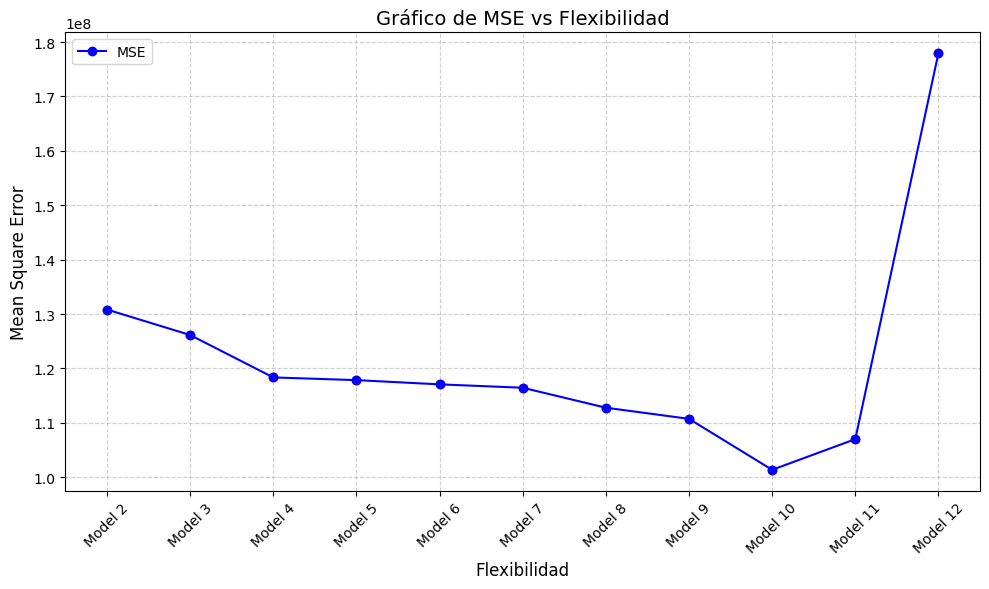

In [36]:
import matplotlib.pyplot as plt

# Datos
models = ["Model 2", "Model 3", "Model 4", "Model 5", "Model 6",
          "Model 7", "Model 8", "Model 9", "Model 10", "Model 11", "Model 12"]
mse_values = [130829257.37, 126147475.22, 118351276.92, 117856842.27,
              117075919.83, 116455443.60, 112786872.19, 110738231.04,
              101367820.34, 107004782.47, 177952311.36]

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(models, mse_values, marker='o', linestyle='-', color='b', label='MSE')
plt.scatter(models, mse_values, color='r')  # Puntos individuales

# Personalización
plt.xlabel("Flexibilidad", fontsize=12)
plt.ylabel("Mean Square Error", fontsize=12)
plt.title("Gráfico de MSE vs Flexibilidad", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje x
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
#Incluyo también el w para borrar todos los missing
X1 = ['w','age', 'sex', 'clase', 'depto', 'formal', 'maxEducLevel', 'oficio','relab', 'college', 'regSalud', 'totalHoursWorked', 'cuentaPropia', 'microEmpresa', 'sizeFirm']

X1 = df_2.loc[:, X1].dropna()  #borro todos los missing

y1 = X1.loc[:, 'w'] # tomo variable dependiente
X1.drop('w', axis=1, inplace=True) #borro "w" de las variables independientes
X1.shape #chequeo que esté todo bien

(9308, 14)